In [1]:
"""
:author: Excellent Willie-Pepple
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Task1: Import data

def get_columns(filename:str)-> [str]:
    """
    Reads the first line of the given CSV file and returns a list of its column names.

    Args:
        filename (str): The path to the CSV file.

    Returns:
        [str]: A list of column names.
    """
    with open(filename, 'r') as file:
        line = [x.strip().split(",")[0] for x in file.readlines()]
        return line


column_names = get_columns("../resources/Airbnb/Airbnb_Data_Info.txt")

In [3]:
airbnb_data = pd.read_csv("../resources/Airbnb/Airbnb_Data.csv", header=None)
airbnb_data

,0,1,2,3,4,5,6,7,8,9,10
0,2318,Entire home/apt,"Seattle, WA, United States",21,4.5,8,4.0,2.5,250,47.610819,-122.290816
1,3335,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,47.529846,-122.275840
2,4291,Private room,"Bellevue, WA, United States",6,3.0,1,NaN,1.0,75,47.609575,-122.120515
3,5682,Entire home/apt,"Seattle, WA, United States",462,5.0,2,NaN,1.0,49,47.523980,-122.359891
4,6606,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,47.654109,-122.337605
...,...,...,...,...,...,...,...,...,...,...,...
494,2578855,Entire home/apt,"Seattle, WA, United States",259,5.0,3,1.0,1.0,70,47.685837,-122.350399
495,2585090,Private room,"Kirkland, WA, United States",10,5.0,1,1.0,1.0,38,47.680862,-122.169830
496,2586350,Entire home/apt,"Seattle, WA, United States",142,4.5,6,NaN,1.0,85,47.539639,-122.276871
497,2586642,Entire home/apt,"Seattle, WA, United States",62,4.5,4,2.0,1.0,123,47.642362,-122.377509


In [4]:
# task 2
airbnb_data.shape
airbnb_data.info()
# airbnb_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       499 non-null    int64  
 1   1       499 non-null    object 
 2   2       499 non-null    object 
 3   3       499 non-null    int64  
 4   4       480 non-null    float64
 5   5       499 non-null    int64  
 6   6       412 non-null    float64
 7   7       492 non-null    float64
 8   8       499 non-null    int64  
 9   9       494 non-null    float64
 10  10      493 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 43.0+ KB


In [5]:
airbnb_data.dtypes


0       int64
1      object
2      object
3       int64
4     float64
5       int64
6     float64
7     float64
8       int64
9     float64
10    float64
dtype: object

In [6]:
airbnb_data.head()


,0,1,2,3,4,5,6,7,8,9,10
0,2318,Entire home/apt,"Seattle, WA, United States",21,4.5,8,4.0,2.5,250,47.610819,-122.290816
1,3335,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,47.529846,-122.275840
2,4291,Private room,"Bellevue, WA, United States",6,3.0,1,NaN,1.0,75,47.609575,-122.120515
3,5682,Entire home/apt,"Seattle, WA, United States",462,5.0,2,NaN,1.0,49,47.523980,-122.359891
4,6606,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,47.654109,-122.337605


In [7]:
#task 3
airbnb_data.columns = column_names
row_numbers = list(np.arange(1, airbnb_data.shape[0]))
new_index = [f"{str(airbnb_data["Address"].iloc[i][0])}{i}" for i in range(airbnb_data.shape[0])]
airbnb_data.index = new_index
airbnb_data.head()
# row_labels

,Room_ID,Room_Type,Address,Reviews,Satisfaction,Accommodates,Bedrooms,Bathrooms,Price,Latitude,Longitude
S0,2318,Entire home/apt,"Seattle, WA, United States",21,4.5,8,4.0,2.5,250,47.610819,-122.290816
S1,3335,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,47.529846,-122.275840
B2,4291,Private room,"Bellevue, WA, United States",6,3.0,1,NaN,1.0,75,47.609575,-122.120515
S3,5682,Entire home/apt,"Seattle, WA, United States",462,5.0,2,NaN,1.0,49,47.523980,-122.359891
S4,6606,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,47.654109,-122.337605


In [8]:
#Task 4.1
# remove rows where both longitude and latitude is missing values
airbnb_data_cleaned = airbnb_data.dropna(subset=["Latitude", "Longitude"])

airbnb_data_cleaned.shape

(491, 11)

In [9]:
#task 4.2
#replace na values of bathroom
airbnb_data_cleaned = airbnb_data_cleaned.copy()
airbnb_data_cleaned.loc[:, "Bathrooms"] = airbnb_data_cleaned["Bathrooms"].fillna(airbnb_data_cleaned["Bathrooms"].mode()[0])

airbnb_data_cleaned.head()

,Room_ID,Room_Type,Address,Reviews,Satisfaction,Accommodates,Bedrooms,Bathrooms,Price,Latitude,Longitude
S0,2318,Entire home/apt,"Seattle, WA, United States",21,4.5,8,4.0,2.5,250,47.610819,-122.290816
S1,3335,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,47.529846,-122.275840
B2,4291,Private room,"Bellevue, WA, United States",6,3.0,1,NaN,1.0,75,47.609575,-122.120515
S3,5682,Entire home/apt,"Seattle, WA, United States",462,5.0,2,NaN,1.0,49,47.523980,-122.359891
S4,6606,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,47.654109,-122.337605


In [10]:
#task 4.3
airbnb_data_cleaned['Satisfaction'] = airbnb_data_cleaned["Satisfaction"].fillna(airbnb_data_cleaned["Satisfaction"].mean()).copy()
airbnb_data_cleaned.head()

,Room_ID,Room_Type,Address,Reviews,Satisfaction,Accommodates,Bedrooms,Bathrooms,Price,Latitude,Longitude
S0,2318,Entire home/apt,"Seattle, WA, United States",21,4.500000,8,4.0,2.5,250,47.610819,-122.290816
S1,3335,Entire home/apt,"Seattle, WA, United States",1,4.767442,4,2.0,1.0,100,47.529846,-122.275840
B2,4291,Private room,"Bellevue, WA, United States",6,3.000000,1,NaN,1.0,75,47.609575,-122.120515
S3,5682,Entire home/apt,"Seattle, WA, United States",462,5.000000,2,NaN,1.0,49,47.523980,-122.359891
S4,6606,Entire home/apt,"Seattle, WA, United States",134,4.500000,2,1.0,1.0,90,47.654109,-122.337605


In [11]:
#task 5
AveragePrice = airbnb_data_cleaned["Price"].mean()
AveragePrice = float(AveragePrice)
print(f"Average rental Price: ${AveragePrice:.2f}")

Average rental Price: $117.43


In [12]:
# task 5.2
satisfaction_filter = airbnb_data_cleaned['Satisfaction'] > 4
airbnb_high_satisfaction = airbnb_data_cleaned[satisfaction_filter]
best_val_rentals = airbnb_high_satisfaction.shape[0]
print(f"Number of Airbnbs with Satisfaction Score above 4: {best_val_rentals}")

Number of Airbnbs with Satisfaction Score above 4: 457


In [13]:
#task 5.3
avg_price_by_room = airbnb_data_cleaned.groupby("Room_Type")["Price"].mean()
avg_price_by_room

Room_Type
Entire home/apt    143.124242
Private room        64.567742
Shared room         70.000000
Name: Price, dtype: float64

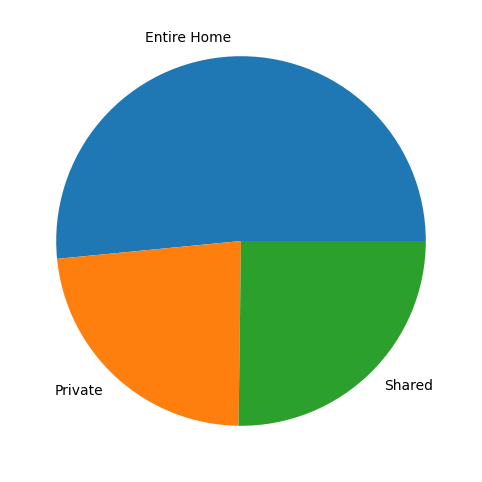

In [14]:
# 5.4
plt.figure(figsize=(12, 6))
plt.pie(avg_price_by_room, labels=["Entire Home", "Private", "Shared"])
plt.show();

In [15]:
airbnb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, S0 to S498
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Room_ID       491 non-null    int64  
 1   Room_Type     491 non-null    object 
 2   Address       491 non-null    object 
 3   Reviews       491 non-null    int64  
 4   Satisfaction  491 non-null    float64
 5   Accommodates  491 non-null    int64  
 6   Bedrooms      407 non-null    float64
 7   Bathrooms     491 non-null    float64
 8   Price         491 non-null    int64  
 9   Latitude      491 non-null    float64
 10  Longitude     491 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 62.2+ KB


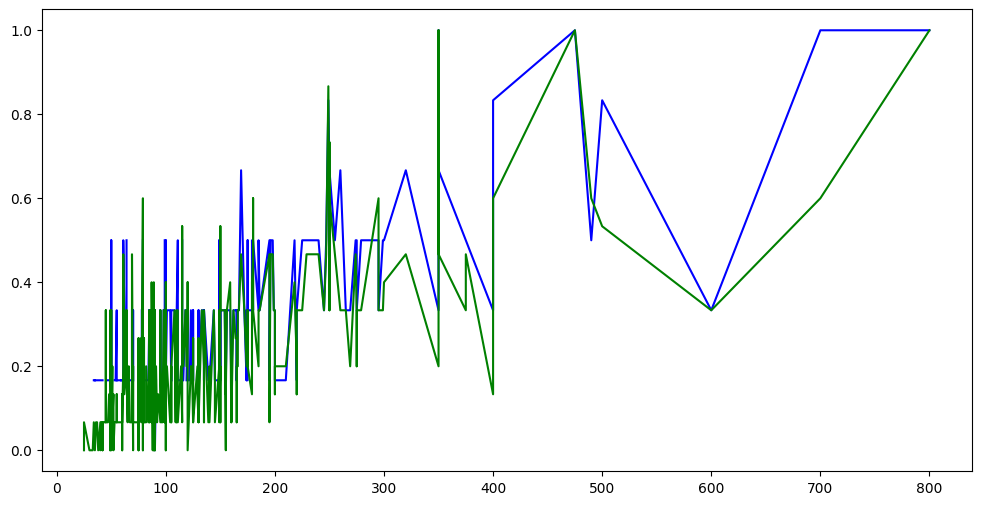

In [16]:
# 5.5
normalize_column = lambda column, frame: (frame[column] - frame[column].min()) / (frame[column].max() - frame[column].min())

normalize_bedrooms = normalize_column("Bedrooms", airbnb_data_cleaned)
normalized_accommodates = normalize_column("Accommodates", airbnb_data_cleaned)
X = pd.DataFrame({"Bedrooms": normalize_bedrooms, "Price": airbnb_data_cleaned["Price"]}).sort_values(by="Price")
Y = pd.DataFrame({"Accommodates": normalized_accommodates, "Price": airbnb_data_cleaned["Price"]}).sort_values(by="Price")

offset = 0.3
plt.figure(figsize=(12, 6))
# plt.plot(X["Bedrooms"], X["Price"], Y["Accommodates"], Y["Price"])
# plt.scatter(X["Bedrooms"], X["Price"])
# plt.hist(X["Bedrooms"], bins=100)
# plt.bar(X["Price"], X["Bedrooms"])
plt.plot(X["Price"], X["Bedrooms"] , color="blue")
# plt.bar(airbnb_data_cleaned["Bedrooms"], airbnb_data_cleaned["Price"], color="blue")
# plt.bar(airbnb_data_cleaned["Accommodates"], airbnb_data_cleaned["Price"], color="green")
plt.plot(Y["Price"], Y["Accommodates"], color="green")
# plt.scatter(normalize_bedrooms, airbnb_data_cleaned["Price"])

plt.show();

In [17]:
# Task 5.6
airbnb_data_cleaned["City"] = airbnb_data_cleaned["Address"].str.split(",").str[0]
airbnb_data_cleaned.head()

,Room_ID,Room_Type,Address,Reviews,Satisfaction,Accommodates,Bedrooms,Bathrooms,Price,Latitude,Longitude,City
S0,2318,Entire home/apt,"Seattle, WA, United States",21,4.500000,8,4.0,2.5,250,47.610819,-122.290816,Seattle
S1,3335,Entire home/apt,"Seattle, WA, United States",1,4.767442,4,2.0,1.0,100,47.529846,-122.275840,Seattle
B2,4291,Private room,"Bellevue, WA, United States",6,3.000000,1,NaN,1.0,75,47.609575,-122.120515,Bellevue
S3,5682,Entire home/apt,"Seattle, WA, United States",462,5.000000,2,NaN,1.0,49,47.523980,-122.359891,Seattle
S4,6606,Entire home/apt,"Seattle, WA, United States",134,4.500000,2,1.0,1.0,90,47.654109,-122.337605,Seattle


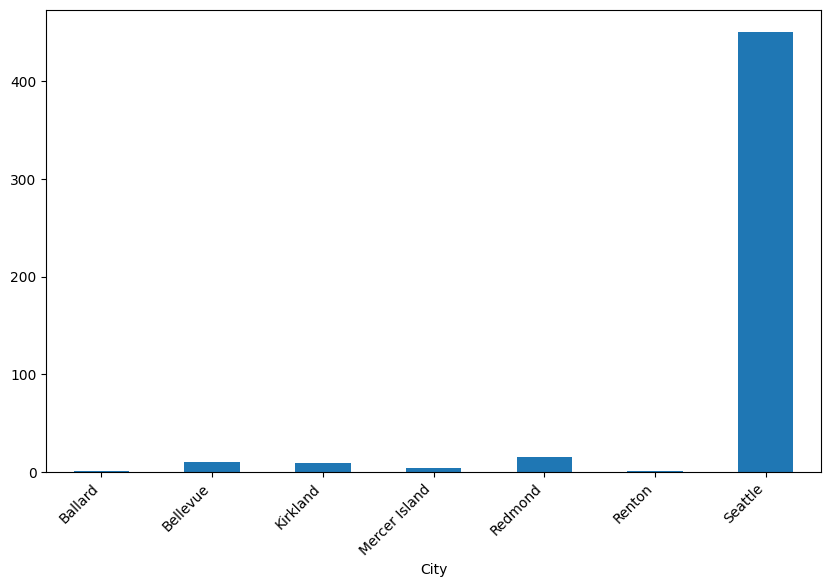

In [18]:
# Task 5.7
rental_by_city = airbnb_data_cleaned.groupby("City").size().sort_index()
plt.figure(figsize=(10, 6))
rental_by_city.plot(kind="bar")
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

plt.show();

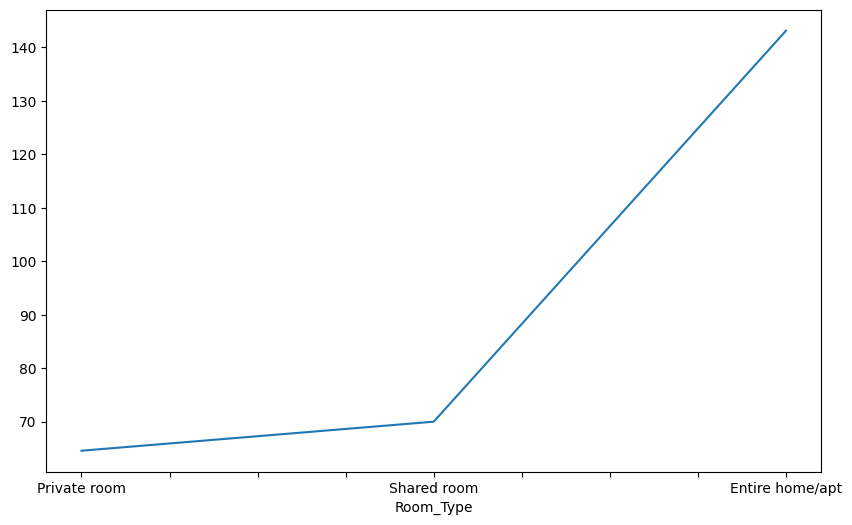

In [19]:
#Task 5.8
avg_price_by_room.sort_values(inplace=True)
plt.figure(figsize=(10, 6))
avg_price_by_room.plot(kind="line")
plt.show();

In [20]:
#5.9
def my_stats(c_label:str):
    df = None
    min  = airbnb_data_cleaned[c_label].min()
    max  = airbnb_data_cleaned[c_label].max()
    mean = airbnb_data_cleaned[c_label].mean()

    df = pd.DataFrame({c_label: [min, max, mean]})
    df.index = ["Min", "Max", "Mean"]
    return df

my_stats("Price")

,Price
Min,25.000000
Max,800.000000
Mean,117.431772


In [21]:
# task 5.10
mask = airbnb_data_cleaned["Satisfaction"] >= 4
airbnb_data_cleaned[mask].groupby("Room_Type")["Satisfaction"].size()

Room_Type
Entire home/apt    323
Private room       149
Shared room          6
Name: Satisfaction, dtype: int64

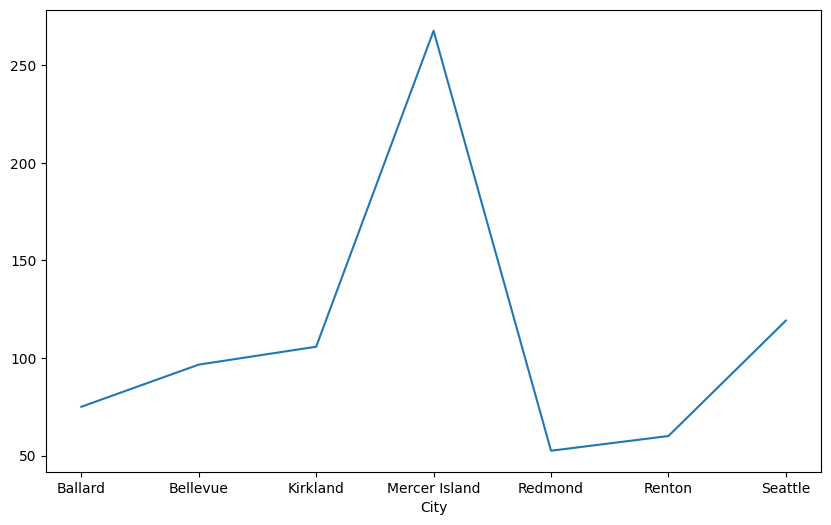

In [22]:
#Task 5.11
rental_price_by_city = airbnb_data_cleaned.groupby("City")["Price"].mean()

plt.figure(figsize=(10, 6))
rental_price_by_city.plot()
plt.show();

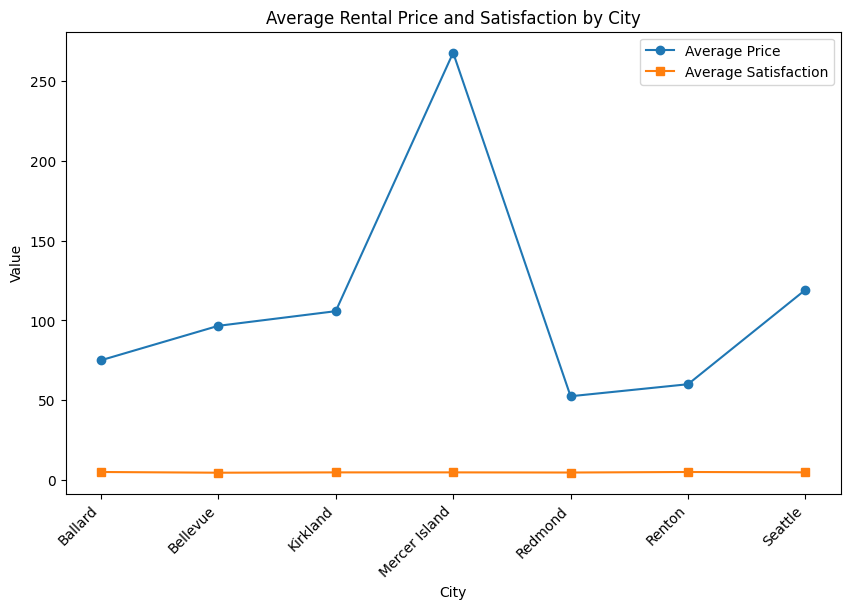

In [23]:
# Task 5.12
avg_satisfaction_by_city = airbnb_data_cleaned.groupby("City")["Satisfaction"].mean()
avg_price_by_city = airbnb_data_cleaned.groupby("City")["Price"].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_city, label="Average Price", marker='o')
plt.plot(avg_satisfaction_by_city, label="Average Satisfaction", marker='s')

plt.xlabel("City")
plt.ylabel("Value")
plt.title("Average Rental Price and Satisfaction by City")
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show();

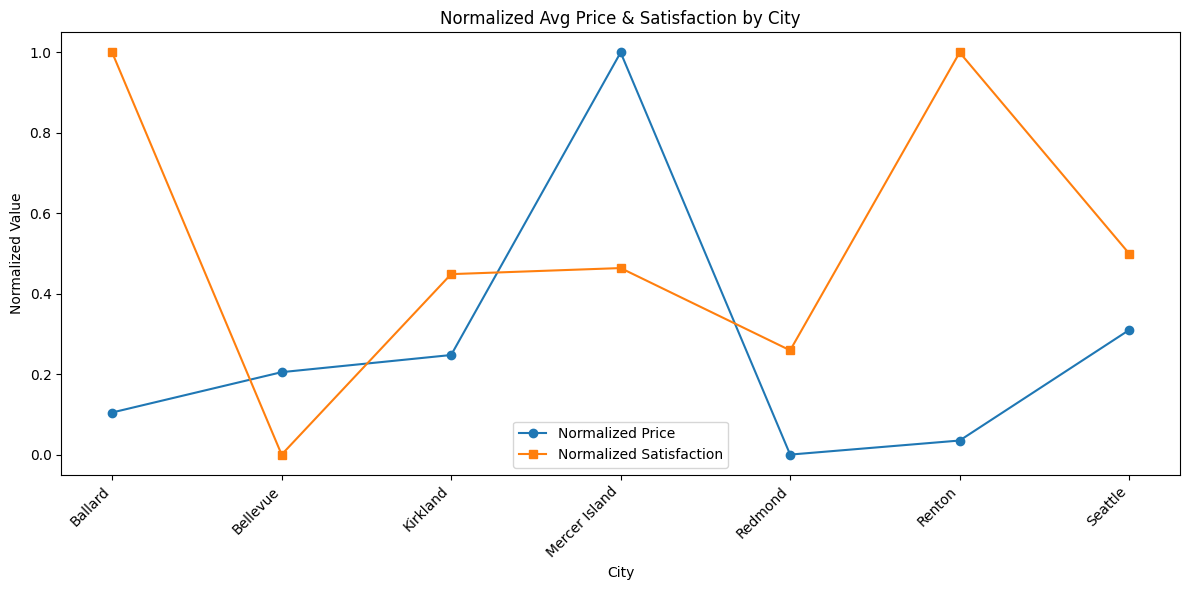

In [24]:
# Normalize function
normalize_column = lambda column, frame: (frame[column] - frame[column].min()) / (frame[column].max() - frame[column].min())

avg_price_df = avg_price_by_city.reset_index()
avg_price_df.columns = ["City", "Price"]
avg_price_df["Normalized_Price"] = normalize_column("Price", avg_price_df)

avg_satisfaction_df = avg_satisfaction_by_city.reset_index()
avg_satisfaction_df.columns = ["City", "Satisfaction"]
avg_satisfaction_df["Normalized_Satisfaction"] = normalize_column("Satisfaction", avg_satisfaction_df)

merged_df = pd.merge(avg_price_df[["City", "Normalized_Price"]], avg_satisfaction_df[["City", "Normalized_Satisfaction"]], on="City")

merged_df = merged_df.sort_values("City")

plt.figure(figsize=(12, 6))
plt.plot(merged_df["City"], merged_df["Normalized_Price"], label="Normalized Price", marker='o')
plt.plot(merged_df["City"], merged_df["Normalized_Satisfaction"], label="Normalized Satisfaction", marker='s')
plt.xlabel("City")
plt.ylabel("Normalized Value")
plt.title("Normalized Avg Price & Satisfaction by City")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


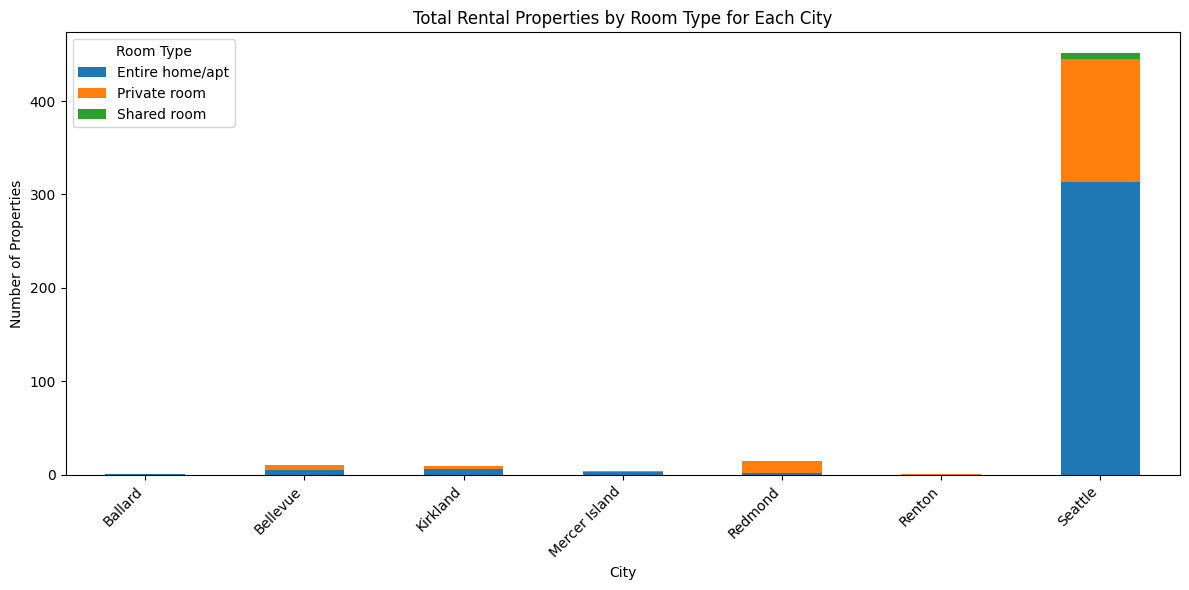

In [25]:
# Task 5.14
room_type_counts = airbnb_data_cleaned.groupby(["City", "Room_Type"]).size().unstack(fill_value=0)
room_type_counts = room_type_counts.sort_index()
room_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Total Rental Properties by Room Type for Each City")
plt.xlabel("City")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()
